# 05. Testes de Hipóteses
---


Testes estatísticos são regras de decisão que permitem avaliar a razoabilidade das hipóteses feitas sobre os parâmetros populacionais e aceitá-las ou rejeitá-las como provavelmente verdadeiras ou falsas tendo como base uma amostra.

Nesta Aula:
0. Um problema e uma Introdução


1. Etapas Básicas de um Teste


2. Teste de Normalidade


3. TESTES PARAMÉTRICOS


    1. Teste Bicaudal
    2. Teste Unicaudal
    4. Testes para Duas Amostras
    
4. TESTES NÃO PARAMÉTRICOS


    1. Teste do Qui-Quadrado
    2. Teste Wilcoxon

# <font color="blue">0. Introdução

Uma máquina automática para encher pacotes de café enche-os segundo uma distribuição normal, com média m e variância sempre igual a 400g2, a máquina foi regula para m = 500g. 

Periodicamente uma amostra de 32 pacotes é recolhida para verificar se a produção está sob controle, isto é m = 500g ou não. 

Se uma dessas amostras apresentar média x = 492g, deve-se parar a produção para regular a máquina ou não? Use significância de 5%.

*Retirado de BUSSAB, W. O.; MORETTIN, P. A. Estatística básica. 6. ed.* ← ótimo livro!
    


Você acha que a máquina está desregulada?

### O que podemos fazer nesse caso?

Entram os testes de hipótese!


**A ideia por trás do teste de hipótese então, é calcular a probabilidade do evento observado e descartar a hipótese caso esse evento seja muito raro**

Podemos começar definindo um intervalo de normalidade de operação da máquina: sabemos que ela não é perfeita, mas os pacotes devem ser produzidos seguindo a distribuição normal de média 500g e variância 400g2.

In [33]:
from scipy.stats import norm
import numpy as np

import matplotlib.pyplot as plt

**Importação das Bibliotecas**

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

sns.set()

## <font color="blue">1. Etapas Básicas de um Teste</font>
***

### **Passo 1** - Formulação das hipóteses $H_0$ e $H_1$

> ### <font color='red'>Pontos importantes</font>
> - A hipótese nula sempre afirma uma igualdade ou propriedade populacional, e $H_1$ a desigualdade que nega $H_0$.
> - No caso da hipótese nula $H_0$ a igualdade pode ser representada por uma igualdade simples "$=$" ou por "$\geq$" e "$\leq$". Sempre complementar ao estabelecido pela hipótese alternativa.
> - A hipótese alternativa $H_1$ deve definir uma desigualdade que pode ser uma diferença simples "$\neq$" ou dos tipos "$>$" e "$<$".


**No nosso problema temos uma condição normal (comum) e uma hipótese:**
    
média normal = 500g e variancia 400g2

hipótese h0: a máquina está funcionando corretamente

hipótese h1: a máquina está desregulada

### **Passo 2** - Escolha da distribuição amostral adequada

> ### <font color='red'>Pontos importantes</font>
> - Quando o tamanho da amostra tiver 30 elementos ou mais, deve-se utilizar a distribuição normal, como estabelecido pelo **teorema do limite central**.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for conhecido, deve-se utilizar a distribuição normal.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional não for desconhecido, deve-se utilizar a distribuição t de Student.

<img style="display: block; margin: 25px auto" src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>



Temos 32 elementos e sabemos o valor de sigma (desvio da população) = 400


In [4]:
import math

math.sqrt(400)

20.0

(array([  6.,  32.,  63., 147., 224., 268., 142.,  84.,  24.,  10.]),
 array([437.84302698, 450.22148847, 462.59994997, 474.97841147,
        487.35687297, 499.73533446, 512.11379596, 524.49225746,
        536.87071896, 549.24918045, 561.62764195]),
 <a list of 10 Patch objects>)

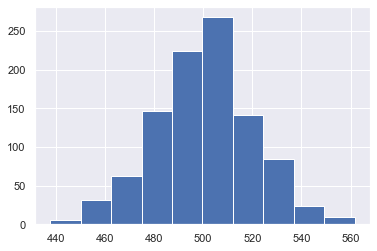

In [6]:
fig, ax = plt.subplots(1,1)

x = np.random.normal(500, 20, 1000)

ax.hist(x)

Pelo gráfico até parece que 492g não está distante de 500g, mas precisamos determinar isso de forma definitiva. 

### **Passo 3** - Fixação da significância do teste ($\alpha$), que define as regiões de aceitação e rejeição das hipóteses (os valores mais freqüentes são 10%, 5% e 1%);

> ### <font color='red'>Pontos importantes</font>
> - O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.
>
> <img alt="Níveis de Confiança e significância" src="https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img001.png" style="display: block; margin: 25px auto" />
>
> - O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.
>
> <img alt="Áreas de Aceitação e Rejeição" src="https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img002.png" style="display: block; margin: 25px auto; border-radius: 10px" />

Vamos usar 5%, isso quer dizer que vamos considerar como resultado "comum", "evento comum", valores de média de amostra que acontecem até 95% das vezes.

Vamos considerar que os valores nos 5% das caudas serão considerados eventos muito raros para nossa amostra e vamos considerar como um sinal de que há algo de errado com a máquina.

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste;

> ### <font color='red'>Pontos importantes</font>
> - Nos testes paramétricos, distância relativa entre a estatística amostral e o valor alegado como provável.
> - Neste passo são obtidas as estatísticas amostrais necessárias à execução do teste (média, desvio-padrão, graus de liberdade etc.)

Relembrando os valores que temos:

média = 500, desvio = 20

média amostra = 492

significância = 5%

H1 do tipo "diferente"

Vamos descobrir o intervalo que determina os 95%:



In [61]:
significancia = 0.05

sig = 20/math.sqrt(32)


maximo = norm.ppf(0.9995, loc=500, scale=sig)
maximo

511.63376882756774

In [62]:
minimo = norm.ppf(0.0005, loc=500, scale=sig)
minimo

488.3662311724324

In [63]:
(minimo,maximo)

(488.3662311724324, 511.63376882756774)

In [64]:
media_amostra = 492

if media_amostra >= minimo and media_amostra <= maximo:
    print('Não rejeitamos a hipótese nula' )
else:
    print('Rejeitamos a hipótese nula')

Não rejeitamos a hipótese nula


In [12]:
norm.cdf(492, loc=500, scale=sig)

0.011825808327677984

Ou seja:

### O funcionamento normal da máquina deve gerar amostras com média entre 493g e 506g

### **Passo 5** - Aceitação ou rejeição da hipótese nula.

> ### <font color='red'>Pontos importantes</font>
> - No caso de o intervalo de aceitação conter a estatística-teste, aceita-se $H_0$ como estatisticamente válido e rejeita-se $H_1$ como tal.
> - No caso de o intervalo de aceitação não conter a estatística-teste, rejeita-se $H_0$ e aceita-se $H_1$ como provavelmente verdadeira. 
> - A aceitação também se verifica com a probabilidade de cauda (p-valor): se maior que $\alpha$, aceita-se $H_0$.



## Conclusão: <font color="red">rejeitamos<font color="black"> a hipótese de que a máquina está regulada e devemos ajustá-la!

## <font color="blue">Vamos agora ver mais exemplos de outros casos

## <font color="blue">1. Teste de Normalidade</font>
***

**Carregando nosso dataset**

In [13]:
df = pd.read_csv('PNAD-2015.csv')

In [14]:
df

,Unnamed: 0,Sexo,Idade,Cor,Estado_civil,Renda,horas_trab,Experiencia,Anos_Estudos,Formal
0,2,4,23,2,5.0,1150,44,20,11.0,1
1,8,4,18,8,0.0,880,40,17,11.0,1
2,17,4,34,8,1.0,790,44,13,11.0,1
3,18,2,35,8,1.0,2000,44,10,11.0,1
4,27,4,30,8,0.0,1000,40,23,15.0,1
...,...,...,...,...,...,...,...,...,...,...
61636,356882,2,30,4,0.0,1500,80,8,6.0,1
61637,356886,2,32,8,NaN,1300,48,7,11.0,1
61638,356887,4,30,8,NaN,1100,60,18,6.0,1
61639,356896,4,36,8,5.0,800,44,6,15.0,1


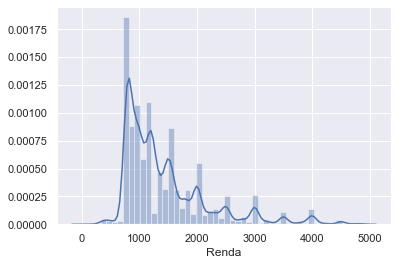

In [18]:
sns.distplot(df[df['Renda']<5000]['Renda'])

### Importando a biblioteca
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [20]:
from scipy.stats import normaltest

A função *normaltest* testa a hipótese nula $H_0$ de que a amostra é proveniente de uma distribuição normal.

- $H_0$: hipótese nula  
- $H_1$: hipótese alternativa

### Definindo a significância do teste ($\alpha$)

In [27]:
confianca = 0.05

In [19]:
significancia = 1 - confianca

### Testando a variável Renda

In [31]:
pvalue = normaltest(df['Renda'])[1]
pvalue

0.0

In [29]:
if pvalue > confianca:
    print('Não rejeitamos a hipótese')
else:
    print('Rejeitamos a hispótese')

NameError: name 'pvalue' is not defined

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq \alpha \, (0,05)$

In [70]:
# H0: a amostra segue uma distribuição normal
# H1: a amostra NÃO segue uma distribuição normal

In [32]:
if pvalue <= significancia:
    print('Rejeita H0, ou seja, a amostra não segue uma distribuição normal.')
else:
    print('Aceita H0, ou seja, a amostra segue uma distribuição normal')

Rejeita H0, ou seja, a amostra não segue uma distribuição normal.


## <font color=blue>3. TESTES PARAMÉTRICOS</font>
***

Quando um teste assume determinadas premissas sobre como os parâmetros de uma população se distribuem, estamos trabalhando com **Testes Paramétricos**.

### <font color=blue>3.1 Teste Bicaudal</font>
***

## <font color='red'>Problema</font>

A empresa **Suco Bom** produz **sucos de frutas em embalagens de 500 ml**. Seu processo de produção é quase todo automatizado e as embalagens de sucos são preenchidas por uma máquina que às vezes apresenta um certo desajuste, levando a erros no preenchimento das embalagens para mais ou menos conteúdo. Quando o volume médio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com os orgãos fiscalizadores. Quando o volume passa de 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção.

O setor de controle de qualidade da empresa **Suco Bom** extrai, periodicamente, **amostras de 50 embalagens** para monitorar o processo de produção. Para cada amostra, é realizado um **teste de hipóteses** para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um **nível de significância de 5%**.

Suponha agora que uma **amostra de 50 embalagens** foi selecionada e que a **média amostral observada foi de 503,24 ml**. **Esse valor de média amostral é suficientemente maior que 500 ml para nos fazer rejeitar a hipótese de que a média do processo é de 500 ml ao nível de significância de 5%?**

---

O **teste bicaudal** é muito utilizado em **testes de qualidade**, como o apresentado em nosso problema acima. Outro exemplo é a avaliação de peças que devem ter um encaixe perfeito (porcas e parafusos, chaves e fechaduras).

![Teste Bicaudal](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img005.png)

---

### Dados do problema

In [5]:
import pandas as pd

amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505, 
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505, 
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501, 
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495, 
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]

In [6]:
dados = pd.DataFrame({'Volume': amostra})
dados

,Volume
0,509
1,505
2,495
3,510
4,496
5,509
6,497
7,502
8,503
9,505


In [39]:
n = dados.shape[0]
n

50

In [40]:
media_amostral = dados['Volume'].mean()
media_amostral

503.24

In [41]:
desvio_amostral = dados['Volume'].std()
desvio_amostral

4.483803050527348

In [42]:
media_original = 500

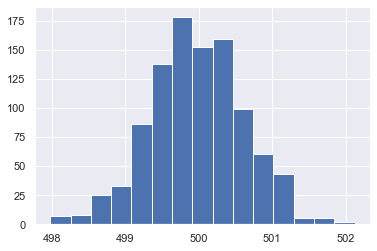

In [45]:
fig, ax = plt.subplots(1, 1)


x = np.random.normal(500, desvio_amostral / math.sqrt(50), 1000)

qtd = ax.hist(x, bins=15)

In [55]:
v1 = qtd[0]
v2 = qtd[1]

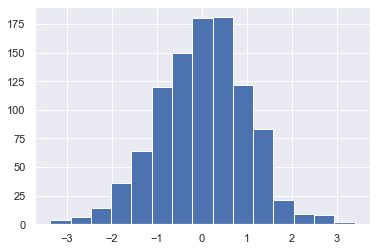

In [65]:
fig, ax = plt.subplots(1, 1)


x = np.random.normal(500, desvio_amostral / math.sqrt(50), 1000)

# (valor-media)/(desvio da amostra)
x = (x-500)/(desvio_amostral / math.sqrt(50))


qtd = ax.hist(x, bins=15)

In [69]:
#95% 1,96

minimo,maximo = (-1.96, 1.96)

In [74]:
norm.ppf(0.9999999, loc=0, scale=1)

5.199337582290661

In [ ]:
99,99999%

In [68]:
media_amostral_normalizada = (media_amostral - 500)/(desvio_amostral / math.sqrt(50))
media_amostral_normalizada

5.109559775991876

In [70]:
if media_amostral_normalizada >= minimo and media_amostra <= maximo:
    print('Não rejeitamos a hipótese nula' )
else:
    print('Rejeitamos a hipótese nula')

Rejeitamos a hipótese nula


### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: \mu = 500 \, ml$

### $H_1: \mu \neq 500 \, ml$ 

---

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [82]:
significancia = 0.05

In [83]:
confianca = 1 - significancia

### Obtendo $z_{\alpha/2}$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

<img style="border-radius: 10px" alt="Região de Aceitação" src="https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img006.png" />

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$z = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img007.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=100%>

### <font color='green'>Critério do valor crítico</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se $z \leq -z_{\alpha / 2}$ ou se $z \geq z_{\alpha / 2}$

In [128]:
z <= -z_alpha_2 or z >= z_alpha_2

NameError: name 'z' is not defined

### <font color='orange'>Conclusão: Como a média amostral $\bar{x}$ é significativamente maior que 500 ml, rejeitamos $H_0$. Neste caso, devem ser tomadas providências para ajustar o maquinário que preenche as embalagens.</font>

### <font color='green'>Critério do $p-valor$</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [78]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pytz>=2017.2 in e:\users\gusta\anaconda3\lib\site-packages (from pandas>=0.21->statsmodels) (2020.1)



You should consider upgrading via the 'e:\Users\gusta\anaconda3\python.exe -m pip install --upgrade pip' command.


https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html

In [2]:
from statsmodels.stats.weightstats import ztest

In [10]:
significancia = 0.05

In [9]:
ztest, pvalue = ztest(x1=dados['Volume'], value=500, alternative='two-sided')

In [11]:
if pvalue > significancia:
    print('Não rejeitamos a hipótese nula' )
else:
    print('Rejeitamos a hipótese nula')

Rejeitamos a hipótese nula


https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

In [13]:
from statsmodels.stats.weightstats import DescrStatsW

In [14]:
teste = DescrStatsW(dados['Volume'])

In [15]:
teste

In [16]:
teste.ztest_mean(value=500, alternative='two-sided')

(5.109559775991874, 3.2291031724457596e-07)

---

## <font color=green>3.2 Teste Unicaudal</font>
***

## <font color='red'>Problema</font>

Um famoso fabricante de refrigerantes alega que uma lata de 350 ml de seu principal produto contém, **no máximo**, **37 gramas de açúcar**. Esta alegação nos leva a entender que a quantidade média de açúcar em uma lata de refrigerante deve ser **igual ou menor que 37 g**.

Um consumidor desconfiado e com conhecimentos em inferência estatística resolve testar a alegação do fabricante e seleciona, aleatóriamente, em um conjunto de estabelecimentos distintos, **uma amostra de 25 latas** do refrigerante em questão. Utilizando o equipamento correto o consumidor obteve as quantidades de açúcar em todas as 25 latas de sua amostra. 

**Assumindo que essa população se distribua aproximadamente como uma normal e considerando um nível de significância de 5%, é possível aceitar como válida a alegação do fabricante?**

In [96]:
# Unicaudal
# 25 latas < 30: t-Student

### 3.2.1. Conhecendo a Distribuição $t$-student
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img004.png' width='250px'>

### Propriedades

- A função densidade da distribuição t de Student tem a mesma forma em sino da distribuição Normal, mas reflete a maior variabilidade (com curvas mais alargadas) que é de se esperar em amostras pequenas.
- Quanto maior o grau de liberdade, mais a distribuição t de Student se aproxima da distribuição Normal.

---

### 3.2.2. Teste Unicaudal

Os **testes unicaudais** verificam as variáveis em relação a um piso ou a um teto e avaliam os valores máximos ou mínimos esperados para os parâmetros em estudo e a chance de as estatísticas amostrais serem inferiores ou superiores a dado limite.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img008.png' width='700px'>

### Dados do problema

In [97]:
amostra = [37.27, 36.42, 34.84, 34.60, 37.49, 
           36.53, 35.49, 36.90, 34.52, 37.30, 
           34.99, 36.55, 36.29, 36.06, 37.42, 
           34.47, 36.70, 35.86, 36.80, 36.92, 
           37.04, 36.39, 37.32, 36.64, 35.45]

In [98]:
len(amostra)

25

In [101]:
# Visualização


In [3]:
# media amostral


In [4]:
# desvio padrão amostral


In [5]:
# número de amostras e número de graus de liberdade


### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$


#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: \mu \leq 37 \, g$

### $H_1: \mu > 37 \, g$

---

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### O tamanho da amostra é maior que 30?
#### Resp.: Não

### Podemos afirmar que a população se distribui aproximadamente como uma normal?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

---

### **Passo 3** - Fixação da significância do teste ($\alpha$)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [106]:
significancia = 0.05

In [107]:
confianca = 1 - significancia

### Obtendo $t_{\alpha}$

In [108]:
from scipy.stats import t as t_student

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img009.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [111]:
t = (media_amostra - u0) / (desvio_amostra / np.sqrt(n))
t

-3.876893119952081

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img010.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se $t \geq t_{\alpha}$

### <font color='green'>Conclusão: Com um nível de confiança de 95% não podemos rejeitar $H_0$, ou seja, a alegação do fabricante é verdadeira.</font>

### <font color='red'>Critério do $p$ valor</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

---

## <font color=green>3.4 Testes para Duas Amostras</font>
***

## <font color='red'>Problema</font>

Em nosso dataset temos os rendimento dos chefes de domicílio obtidos da Pesquisa Nacional por Amostra de Domicílios - PNAD no ano de 2015. Um problema bastante conhecido em nosso país diz respeito a desigualdade de renda, principalmente entre homens e mulheres.

Duas amostras aleatórias, uma de **500 homens** e outra com **500 mulheres**, foram selecionadas em nosso dataset. Com o objetivo de comprovar tal desigualdade, **teste a igualdade das médias** entre estas duas amostras com um nível de **significância de 1%**.

---

É possível também utilizar testes de hipóteses para comparar duas diferentes amostras. Neste tipo de teste se deseja decidir se uma amostra é diferente da outra.

### Seleção das amostras

In [28]:
df.head()

,Unnamed: 0,Sexo,Idade,Cor,Estado_civil,Renda,horas_trab,Experiencia,Anos_Estudos,Formal
0,2,4,23,2,5.0,1150,44,20,11.0,1
1,8,4,18,8,0.0,880,40,17,11.0,1
2,17,4,34,8,1.0,790,44,13,11.0,1
3,18,2,35,8,1.0,2000,44,10,11.0,1
4,27,4,30,8,0.0,1000,40,23,15.0,1


### Obtendo dados do problema

- Média e desvio padrão das mulheres
- Média e desvio padrão dos homens
- Número de amostras (homens e mulheres)
- Nível de significância e confiança

In [51]:
u1, u2

(1831.844, 1448.776)

In [54]:
significancia = 0.01
confianca = 0.99

In [55]:
D0 = 0 # termo constante isolado na formulação das hipóteses

---

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $\mu_1 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo masculino
### $\mu_2 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo feminino

### $
\begin{cases}
H_0: \mu_1 \leq \mu_2\\
H_1: \mu_1 > \mu_2
\end{cases}
$

### ou

### $
\begin{cases}
H_0: \mu_1 -\mu_2 \leq 0\\
H_1: \mu_1 -\mu_2 > 0
\end{cases}
$

---

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### <font color='red'><strong>Observação importante</strong></font>

> **Em testes que envolvam duas amostras com o emprego da tabela $t$ de Student, o número de graus de liberdade será sempre igual a $n_1 + n_2 - 2$**

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [56]:
significancia = 0.01
confianca = 1 - significancia

### Diferenças entre `ppf`, `cdf` e `sf`

1. `ppf`: **passamos um valor de probabilidade** e ele **retorna um valor no eixo** `z` (norm) ou `t` (t_student).
    - Quando estamos com uma Normal/t-Student bicaudal, então, passamos $\beta + \alpha / 2$
    - Quando estamos com uma Normal/t-Student unicaudal à esquerda (confiança), então, passamos somente o $\beta$
    - Quando estamos com uma Normal/t-Student unicaudal à direita (confiança), então, passamos somente o $\alpha$
2. `cdf`: **passamos um valor no eixo** `z` (norm) ou `t` (t_student) e ele **retorna um valor de probabilidade**, à esqueda do valor passado como parâmetro.
3. `sf`: **passamos um valor no eixo** `z` (norm) ou `t` (t_student) e ele **retorna um valor de probabilidade**, à direita do valor passado como parâmetro.

#### Legenda
- $\beta$: confiança
- $\alpha$: significância

In [57]:
z_alpha = norm.ppf(confianca)
z_alpha

2.3263478740408408

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img011.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$z = \frac{(\bar{x_1} - \bar{x_2})-D_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img012.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img014.png' width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Unicaudal
> ### Rejeitar $H_0$ se $z \geq z_{\alpha}$

In [60]:
z >= z_alpha

True

### <font color='green'>Conclusão: Com um nível de confiança de 99% rejeitamos $H_0$, isto é, concluímos que a média das rendas dos chefes de domicílios do sexo masculino é maior que a média das rendas das chefes de domicílios do sexo feminino. Confirmando a alegação de desigualdade de renda entre os sexos.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Teste Unicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

### Facilitando os cálculos com o Python
---

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.CompareMeans.html

In [61]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

**Utilizando o CompareMeans**

---

# <font color=blue>4. TESTES NÃO PARAMÉTRICOS</font>
***

O trabalho com pequenas amostras pode levar a não aceitação da validade do teorema central do limite e também na impossibilidade de fazer suposições sobre a distribuição da variável avaliada. Quando isso ocorre torna-se necessária a aplicação de testes não paramétricos. Nos testes não paramétricos, não fazemos hipóteses sobre a distribuição (de probabilidade) das quais as observações são extraídas.

## <font color='red'>Problema</font>

Antes de cada partida do campeonato nacional de futebol, as moedas utilizadas pelos árbitros devem ser verificadas para se ter certeza de que não são viciadas, ou seja, que não tendam para determinado resultado. Para isso um teste simples deve ser realizado antes de cada partida. Este teste consiste em lançar a moeda do jogo **50 vezes** e contar as frequências de **CARAS** e **COROAS** obtidas. A tabela abaixo mostra o resultado obtido no experimento:

||CARA|COROA|
|-|-|-|
|Observado|17|33|
|Esperado|25|25|

A um **nível de significância de 5%**, é possível afirmar que a moeda não é honesta, isto é, que a moeda apresenta uma probabilidade maior de cair com a face **CARA** voltada para cima?

### <font color=blue>4.1 Teste do Qui-Quadrado ( $\chi^2$)</font>
***

Também conhecido como teste de adequação ao ajustamento, seu nome se deve ao fato de utilizar uma variável estatística padronizada, representada pela letra grega qui ( $\chi$) elevada ao quadrado. A tabela com os valores padronizados e como obtê-la podem ser vistos logo abaixo.

O teste do $\chi^2$ testa a hipótese nula de não haver diferença entre as frequências observadas de um determinado evento e as frequências que são realmente esperadas para este evento.

Os passos de aplicação do teste são bem parecidos aos vistos para os testes paramétricos.

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img017.png)

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img016.png' width='250px'>

Tabela com os valores de $\chi_p^2$ em função dos graus de liberdade $(n - 1)$ e de $p = P(\chi^2 \leq \chi_p^2)$

## <font color='red'>Problema</font>

Antes de cada partida do campeonato nacional de futebol, as moedas utilizadas pelos árbitros devem ser verificadas para se ter certeza de que não são viciadas, ou seja, que não tendam para determinado resultado. Para isso um teste simples deve ser realizado antes de cada partida. Este teste consiste em lançar a moeda do jogo **50 vezes** e contar as frequências de **CARAS** e **COROAS** obtidas. A tabela abaixo mostra o resultado obtido no experimento:

||CARA|COROA|
|-|-|-|
|Observado|17|33|
|Esperado|25|25|

A um **nível de significância de 5%**, é possível afirmar que a moeda não é honesta, isto é, que a moeda apresenta uma probabilidade maior de cair com a face **CARA** voltada para cima?

---

### Dados do problema

In [17]:
F_observada = [17, 33]
F_esperada = [25, 25]

k = 2

graus_de_liberdade = k - 1 

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: F_{CARA} = F_{COROA}$

### $H_1: F_{CARA} \neq F_{COROA}$

---

### **Passo 2** - fixação da significância do teste ($\alpha$)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi.html

In [22]:
significancia = 0.01
confianca = 1 - significancia

### Obtendo $\chi_{\alpha}^2$

In [19]:
from scipy.stats import chi2

In [23]:
chi2_alpha = chi2.ppf(confianca, graus_de_liberdade)
chi2_alpha

6.6348966010212145

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img018.png)

---

### **Passo 3** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$\chi^2 = \sum_{i=1}^{k}{\frac{(F_{i}^{Obs} - F_{i}^{Esp})^2}{F_{i}^{Esp}}}$$

Onde

$F_{i}^{Obs}$ = frequência observada para o evento $i$

$F_{i}^{Esp}$ = frequência esperada para o evento $i$

$k$ = total de eventos possíveis

In [21]:
chi_2 = 0

F_observada = [17, 33]
F_esperada = [25, 25]

k = 2

graus_de_liberdade = k - 1 

for coluna in range(k):
    chi_2 += (F_observada[coluna] - F_esperada[coluna])**2 / F_esperada[coluna]

chi_2

5.12

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img019.png)

---

### **Passo 4** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img020.png' width=80%>

### <font color='red'>Critério do valor crítico</font>

> ### Rejeitar $H_0$ se $\chi_{teste}^2 > \chi_{\alpha}^2$

### <font color='green'>Conclusão: Com um nível de confiança de 95% rejeitamos a hipótese nula ($H_0$) e concluímos que as frequências observadas e esperadas são discrepantes, ou seja, a moeda não é honesta e precisa ser substituída.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

In [24]:
from scipy.stats import chisquare

In [25]:
chisquare(F_observada, F_esperada)

Power_divergenceResult(statistic=5.12, pvalue=0.023651616655356)

---

## <font color='red'>Problema</font>

Um novo tratamento para acabar com o hábito de fumar está sendo empregado em um grupo de **35 pacientes** voluntários. De cada paciente testado foram obtidas as informações de quantidades de cigarros consumidos por dia antes e depois do término do tratamento. Assumindo um **nível de confiança de 95%** é possível concluir que, depois da aplicação do novo tratamento, houve uma mudança no hábito de fumar do grupo de pacientes testado?

## <font color=green>4.2 Teste Wilcoxon</font>
### Comparação de duas populações - amostras dependentes
***

Empregado quando se deseja comparar duas amostras relacionadas, amostras emparelhadas. Pode ser aplicado quando se deseja testar a diferença de duas condições, isto é, quando um mesmo elemento é submetido a duas medidas.

### Dados do problema

In [26]:
fumo = {
    'Antes': [39, 25, 24, 50, 13, 52, 21, 29, 10, 22, 50, 15, 36, 39, 52, 48, 24, 15, 40, 41, 17, 12, 21, 49, 14, 55, 46, 22, 28, 23, 37, 17, 31, 49, 49],
    'Depois': [16, 8, 12, 0, 14, 16, 13, 12, 19, 17, 17, 2, 15, 10, 20, 13, 0, 4, 16, 18, 16, 16, 9, 9, 18, 4, 17, 0, 11, 14, 0, 19, 2, 9, 6]
}

In [29]:
fumo = pd.DataFrame({'Antes': [39, 25, 24, 50, 13, 52, 21, 29, 10, 22, 50, 15, 36, 39, 52, 48, 24, 15, 40, 41, 17, 12, 21, 49, 14, 55, 46, 22, 28, 23, 37, 17, 31, 49, 49],
    'Depois': [16, 8, 12, 0, 14, 16, 13, 12, 19, 17, 17, 2, 15, 10, 20, 13, 0, 4, 16, 18, 16, 16, 9, 9, 18, 4, 17, 0, 11, 14, 0, 19, 2, 9, 6]})
fumo

,Antes,Depois
0,39,16
1,25,8
2,24,12
3,50,0
4,13,14
5,52,16
6,21,13
7,29,12
8,10,19
9,22,17


In [28]:
confianca = 0.95
significancia = 1 - confianca
n = 35

In [30]:
media_antes = fumo.Antes.mean()
media_antes

31.857142857142858

In [31]:
media_depois = fumo.Depois.mean()
media_depois

11.2

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: \mu_{antes} = \mu_{depois}$

### $H_1: \mu_{antes} \neq \mu_{depois}$

---

### **Passo 2** - escolha da distribuição amostral adequada

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

### Obtendo $z_{\alpha/2}$

In [36]:

z_alpha_2 = norm.ppf(confianca + significancia / 2)
z_alpha_2

1.959963984540054

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img006.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$Z = \frac{T - \mu_T}{\sigma_T}$$

Onde

## $T$ = menor das somas de postos de mesmo sinal

# $$\mu_T = \frac{n(n+1)}{4}$$
# $$\sigma_T = \sqrt{\frac{n(n + 1)(2n + 1)}{24}}$$

### Construindo a tabela com os postos

### Obter $T$

## $T$ = menor das somas de postos de mesmo sinal

### Obter $\mu_T$

# $$\mu_T = \frac{n(n+1)}{4}$$


### Obter $\sigma_T$

# $$\sigma_T = \sqrt{\frac{n(n + 1)(2n + 1)}{24}}$$

### Obter $Z_{teste}$

# $$Z = \frac{T - \mu_T}{\sigma_T}$$

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img021.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img022.png' width='80%'>

### <font color='red'>Critério do valor crítico</font>

> ### Rejeitar $H_0$ se $Z \leq -z_{\alpha / 2}$ ou se $Z \geq z_{\alpha / 2}$

In [165]:
Z <= z_alpha_2 or Z >= z_alpha_2

True

In [166]:
if (Z <= z_alpha_2 or Z >= z_alpha_2):
    print('Rejeita H0, ou seja, existe uma diferença entre os grupos.')
else:
    print('Aceita H0, ou seja, os grupos não apresentam diferença.')

Rejeita H0, ou seja, existe uma diferença entre os grupos.


### <font color='green'>Conclusão: Rejeitamos a hipótese de que não existe diferença entre os grupos, isto é, existe uma diferença entre as médias de cigarros fumados pelos pacientes antes e depois do tratamento. E como é possível verificar através das médias de cigarros fumados por dia antes (31.86) e depois (11.2) do tratamento, podemos concluir que o tratamento apresentou resultado satisfatório.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html

In [37]:
from scipy.stats import wilcoxon

In [38]:
estatistica_de_teste, pvalor = wilcoxon(x=fumo.Antes, y=fumo.Depois)
estatistica_de_teste, pvalor

(22.0, 1.584310018505865e-06)

In [39]:
if pvalor <= significancia:
    print('Rejeita H0, ou seja, as médias de cigarro fumado antes e depois são diferentes. Em outras palavras, o tratamento surtiu algum efeito.')

Rejeita H0, ou seja, as médias de cigarro fumado antes e depois são diferentes. Em outras palavras, o tratamento surtiu algum efeito.


---